In [1]:
import matplotlib.pyplot as plt
from skimage import feature
import numpy as np
import cv2

In [2]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

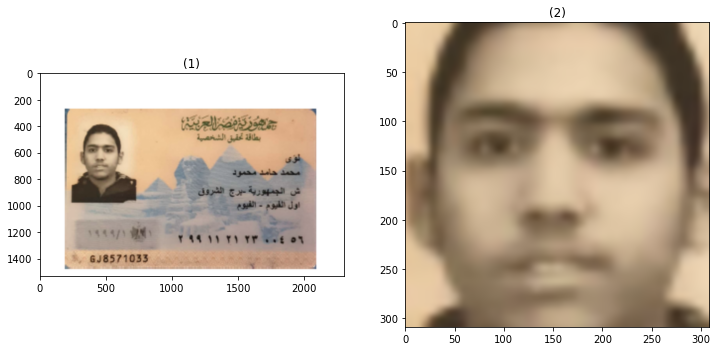

In [3]:
TestDir = "C:\\Collage\\GP\\test\\"
#load image
far_face_image = cv2.imread(TestDir+"Loay Mohamed - ID.png")

# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(far_face_image, is_dir=False, is_gray=False)
far_face = None
for face in faces:
    far_face = far_face_image[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
show_images([far_face_image,far_face])

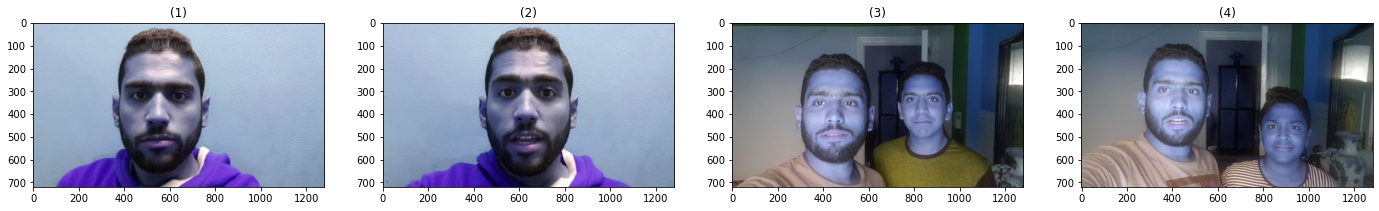

In [84]:
TestDir = "C:\\Collage\\GP\\test\\"
cap = cv2.VideoCapture(TestDir+"no_speak.mp4")
success, img1 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"speaking.mp4")
success, img2 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"modhek.mp4")
success, img3 = cap.read()
#release cap
cap.release

cap = cv2.VideoCapture(TestDir+"testt.mp4")
success, img4 = cap.read()
#release cap
cap.release
show_images([img1, img2, img3, img4])

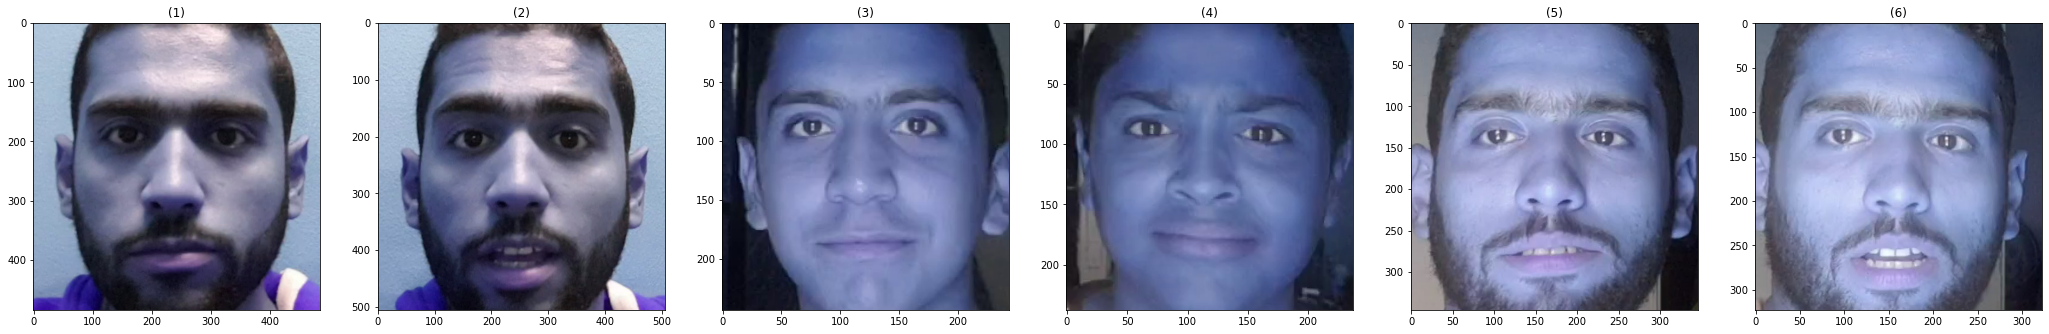

In [98]:
# detect there faces
from Emotions_Detection.Models.face_detection import get_faces_from_image

faces = get_faces_from_image(img1, is_dir=False, is_gray=False)
face1 = None
for face in faces:
    face1 = img1[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img2, is_dir=False, is_gray=False)
face2 = None
for face in faces:
    face2 = img2[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img3, is_dir=False, is_gray=False)
face3 = None
face4 = None
face= faces[0]
face3 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
face= faces[1]
face31 = img3[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(img4, is_dir=False, is_gray=False)
face= faces[0]
face4 = img4[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]
face= faces[1]
face41 = img4[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

show_images([face1, face2, face3, face4,face31, face41])


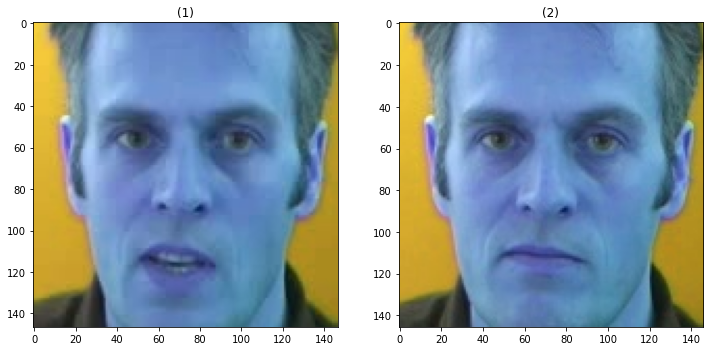

In [78]:
## test on diff images:
imgg1 = cv2.imread(TestDir+"frame0.jpg")
imgg2 = cv2.imread(TestDir+"frame69.jpg")

faces = get_faces_from_image(imgg1, is_dir=False, is_gray=False)
face11 = None
for face in faces:
    face11 = imgg1[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

faces = get_faces_from_image(imgg2, is_dir=False, is_gray=False)
face12 = None
for face in faces:
    face12 = imgg2[face[1]:face[1]+face[3], face[0]:face[0]+face[2]]

show_images([face11, face12])

## LBP (Local Binary Patterns)

In [207]:
class LocalBinaryPatterns:
  def __init__(self , numPoints , radius):
    self.numPoints = numPoints
    self.radius = radius

  def describe(self , image , eps=1e-7):
    lbp = feature.local_binary_pattern(image , self.numPoints , self.radius)
    hist = plt.hist(lbp.ravel())
    return lbp , hist

In [208]:
desc = LocalBinaryPatterns(8 , 4)

In [209]:
def preprocess_img(face_img):
  face = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
  lbp , hist = desc.describe(face)
  return lbp , hist

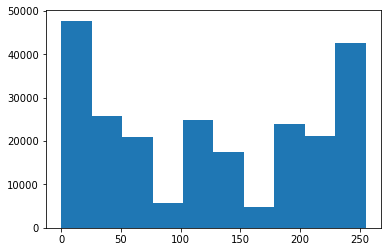

In [210]:
lbp1 , hist1 = preprocess_img(face1)

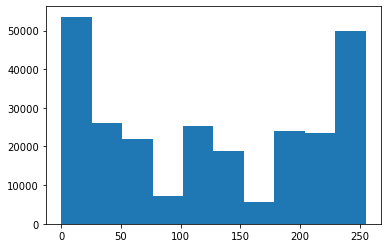

In [211]:
lbp2 , hist2 = preprocess_img(face2)

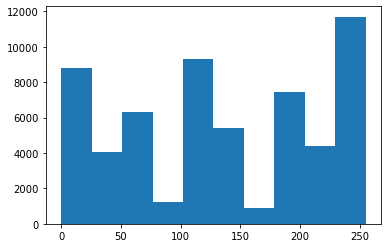

In [212]:
lbp3 , hist3 = preprocess_img(face3)

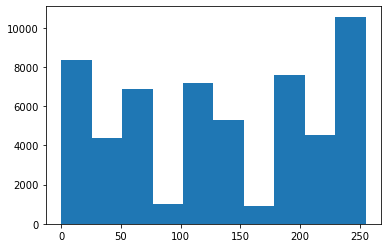

In [213]:
lbp4 , hist4 = preprocess_img(face4)

In [214]:
# find normalized distance between vectors
d1= np.array(hist1[0])
d2= np.array(hist2[0])
d3= np.array(hist3[0])
d4= np.array(hist4[0])

dist12 = np.linalg.norm(d1-d2)*2 / (np.linalg.norm(d1)+np.linalg.norm(d2))
print(dist12)
dist13 = np.linalg.norm(d1-d3)*2 / (np.linalg.norm(d1)+np.linalg.norm(d3))
print(dist13)
dist14 = np.linalg.norm(d1-d4)*2 / (np.linalg.norm(d1)+np.linalg.norm(d4))
print(dist14)

dist23 = np.linalg.norm(d2-d3)*2 / (np.linalg.norm(d2)+np.linalg.norm(d3))
print(dist23)
dist24 = np.linalg.norm(d2-d4)*2 / (np.linalg.norm(d2)+np.linalg.norm(d4))
print(dist24)

dist34 = np.linalg.norm(d3-d4)*2 / (np.linalg.norm(d3)+np.linalg.norm(d4))
print(dist34)



0.10937985089375146
1.2095127303836433
1.2464643973823375
1.2695258986343252
1.304795025599933
0.12368091792907225


In [219]:
dAll = np.array([d1,d2,d3,d4])
print(d1)
print(d2)
print(d3)
print(d4)
dAvg = np.mean(dAll, axis=0)
print(dAvg)

[47795. 25881. 20927.  5712. 24987. 17382.  4843. 23885. 21082. 42731.]
[53572. 26171. 21865.  7166. 25384. 18908.  5639. 24088. 23443. 49800.]
[ 8823.  4055.  6297.  1236.  9313.  5394.   890.  7437.  4390. 11701.]
[ 8352.  4387.  6856.   989.  7166.  5318.   918.  7568.  4526. 10564.]
[29635.5  15123.5  13986.25  3775.75 16712.5  11750.5   3072.5  15744.5
 13360.25 28699.  ]


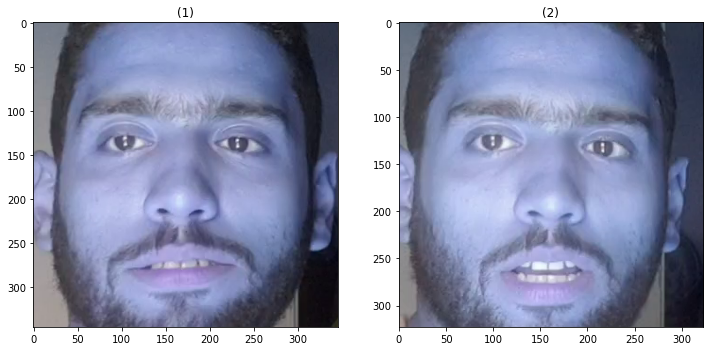

0.1400396400956233


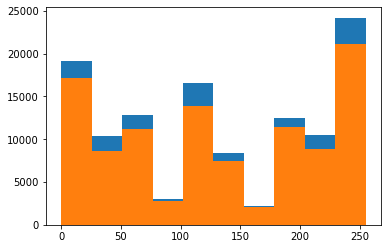

In [215]:
show_images([face31, face41])
lbp31 , hist31 = preprocess_img(face31)
lbp41 , hist41 = preprocess_img(face41)
d31= np.array(hist31[0])
d41= np.array(hist41[0])
dist3141 = np.linalg.norm(d41-d31)*2 / (np.linalg.norm(d31)+np.linalg.norm(d41))
print(dist3141)

0.06961074867343055


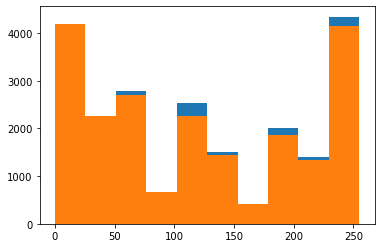

In [216]:
lbp11 , hist11 = preprocess_img(face11)
lbp12 , hist12 = preprocess_img(face12)
d11= np.array(hist11[0])
d12= np.array(hist12[0])
dist1112 = np.linalg.norm(d11-d12)*2 / (np.linalg.norm(d11)+np.linalg.norm(d12))
print(dist1112)



LBP algorithm, instead of looking into the entire image, it first divide the whole image into a SxS grid. Then this algorithm convert each grid into the LBP format and obtain the intensity distribution of that particular grid. After doing this process, this model produces S^2 histogram. After doing that, the model concatnate all of the produced histograms. Then we perform distance between histograms to find if face now is the same as the previous face.